# Optical Flow with Convolution Neural Networks

The paper's version of optical flow produces a vector <-x, +x, -y, +y, -z, +z>.
Our result vector needs to change in track_object(frame1, frame2, x, y, w, h, steps) - currently the displacement should be `[x,y]`, so we'll just need to do some conditional wizardry and expand it out.

*NOTE:* Prior to running any of this, a virtual environment is needed. Once in the venv, run `pip install -r requirements.txt` to prepare all of the required libraries.

In [1]:
import numpy as np
flow = np.array([-2,3])
final_flow = np.array([0, 0, 0, 0, 0, 0])

if flow[0] < 0:
    final_flow[0] = abs(flow[0])
elif flow[0] > 0:
    final_flow[1] = abs(flow[0])

if flow[1] < 0:
    final_flow[2] = abs(flow[1])
elif flow[1] > 0:
    final_flow[3] = abs(flow[1])
final_flow

array([2, 0, 0, 3, 0, 0])

The videos used are all releaseed under the Creative Commons Attribution 3.0 license.
We can generate the list of all files in the training directory (in this case, a scene from "Big Buck Bunny") as follows:

In [2]:
import os
file_list = os.listdir("bunny")

We'll need to add the directory name to the beginning of each file:

In [3]:
for x in range(len(file_list)):
    file_list[x] = 'bunny/' + file_list[x]

First off, let's look at a couple of optical flow examples.

In [4]:
from optical_flow import run_lk

flow_vector = run_lk(file_list[0], file_list[1], 124, 158, 254, 233, steps=5)
flow_vector

[67.1698, 0, 0, 30.573202, 0, 0]

We can track the same bounding box's movement in the next frame as well:

In [5]:
flow_vector = run_lk(file_list[1], file_list[2], 124-flow_vector[0]+flow_vector[1],
                                                 158-flow_vector[2]+flow_vector[3],
                                                 254, 233, steps=5)
flow_vector

[0, 1.909421, 0, 25.694927, 0, 0]

Preparing the dataset will use the `prepare_dataset` function in the `optical_flow.py` file. The signature for this function is:
`prepare_dataset(files_list, result_file, x, y, w, h, steps=5)`
The bounding box should be determined for the scene, and consists of the x,y,w,h parameters.

In [6]:
from optical_flow import prepare_dataset
prepare_dataset(file_list, "train-data.csv", 124, 158, 254, 233, steps=5)

To train and evaluate the neural net, we'll use the Lkvf file.

In [7]:
from Lkvf import train
history = train()

Using TensorFlow backend.
Epoch 1/100
149/149 [==============================] - 0s 1ms/step - loss: 0.6834 - accuracy: 0.6857
Epoch 2/100
149/149 [==============================] - 0s 453us/step - loss: 0.6758 - accuracy: 0.7964
Epoch 3/100
149/149 [==============================] - 0s 413us/step - loss: 0.6686 - accuracy: 0.8311
Epoch 4/100
149/149 [==============================] - 0s 429us/step - loss: 0.6606 - accuracy: 0.8949
Epoch 5/100
149/149 [==============================] - 0s 485us/step - loss: 0.6512 - accuracy: 0.9161
Epoch 6/100
149/149 [==============================] - 0s 423us/step - loss: 0.6464 - accuracy: 0.9362
Epoch 7/100
149/149 [==============================] - 0s 431us/step - loss: 0.6379 - accuracy: 0.9418
Epoch 8/100
149/149 [==============================] - 0s 450us/step - loss: 0.6321 - accuracy: 0.9463
Epoch 9/100
149/149 [==============================] - 0s 428us/step - loss: 0.6221 - accuracy: 0.9575
Epoch 10/100
149/149 [===========================

Once we're trained up, we can check some visualizing through matplotlib to get an idea of our accuracy. This can be seen to approach very close to 100% accuracy, and finishes the training and evaluating loop with less than 1% loss.

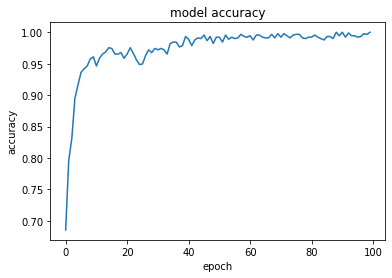

In [8]:
from matplotlib import pyplot as plt


plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

And the loss factor in the model:

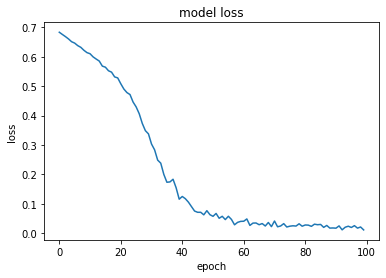

In [9]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()